In [1]:
import re
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)
import numpy as np 
import pandas as pd
import os
import gc
import gzip
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
x_min = 0
x_max = 97.7228
y_min = 0
y_max = 166.129
x_len = x_max - x_min
y_len = y_max - y_min
ang3_to_cm3 = (1e8)**3
avo_num = 6.0221409e+23
gap_sizes = ['06','10','20','30']
pressure_diffs = ['100','200','500','1000']

gap_sizes = ['06','10','20','30']
pressure_diffs = ['100','200','500','1000']
colors = ['blue','green','red','purple']

C:\Users\rvick\AppData\Local\Temp/ipykernel_4272/52088216.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  v_fig,v_ax = plt.subplots()


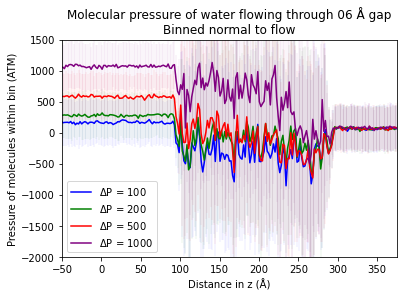

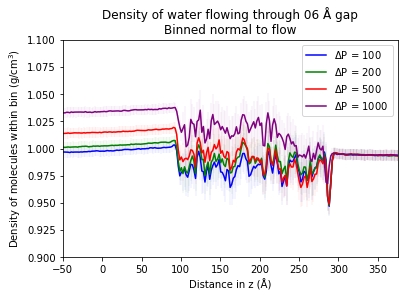

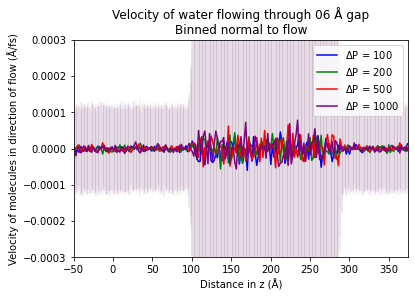

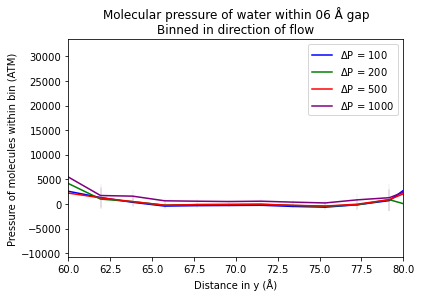

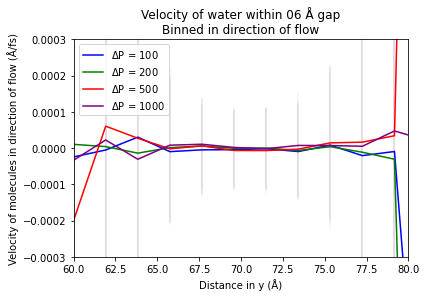

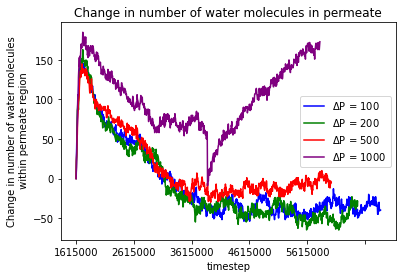

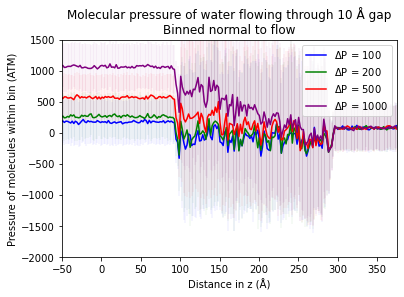

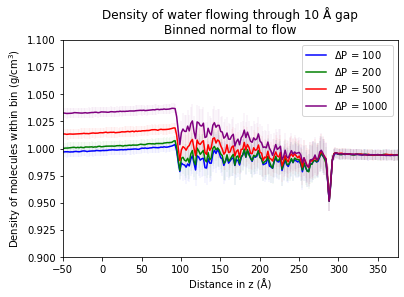

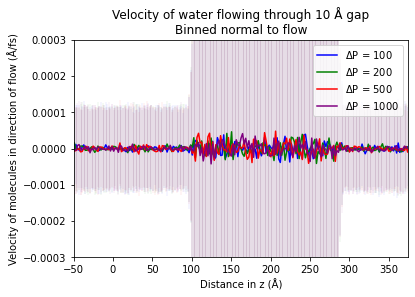

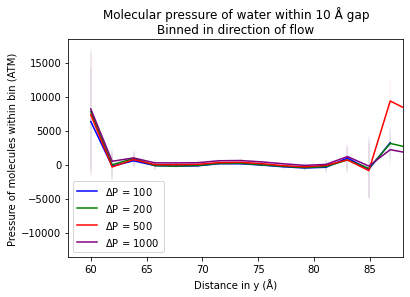

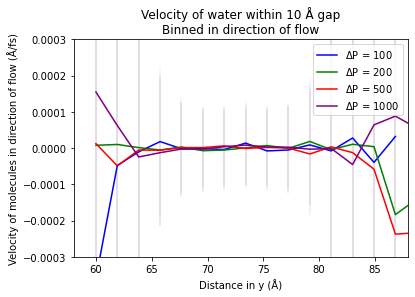

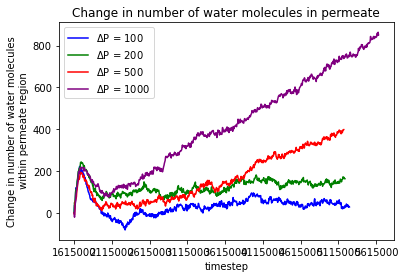

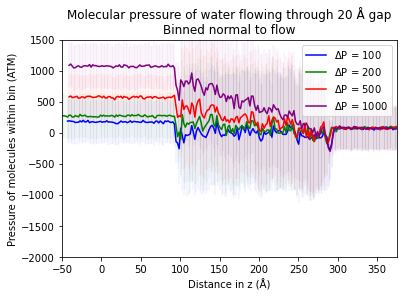

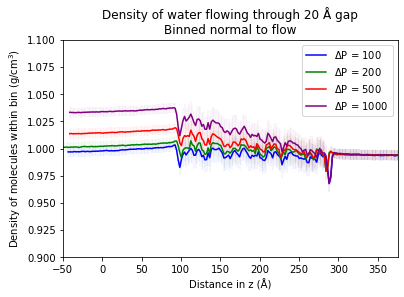

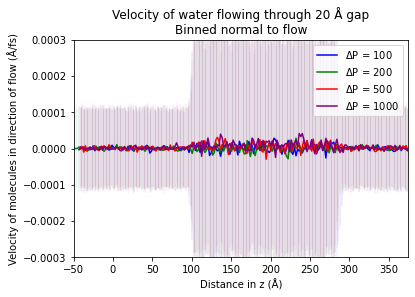

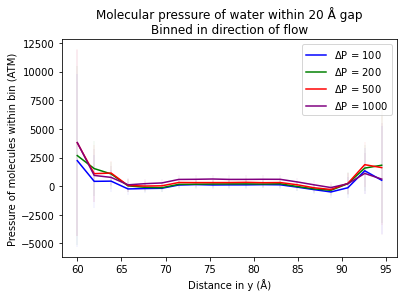

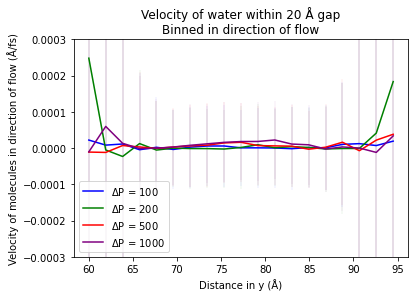

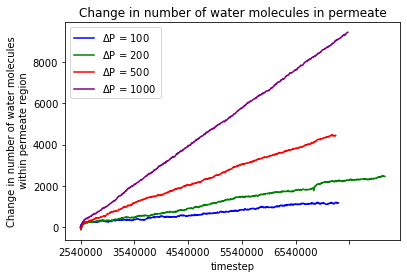

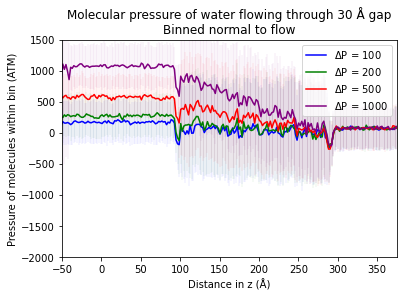

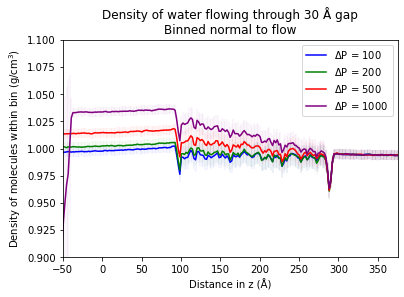

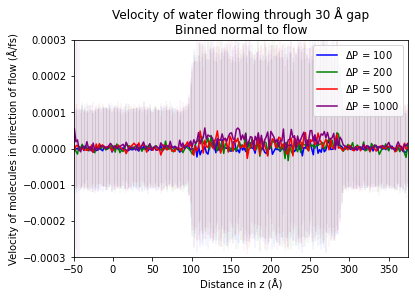

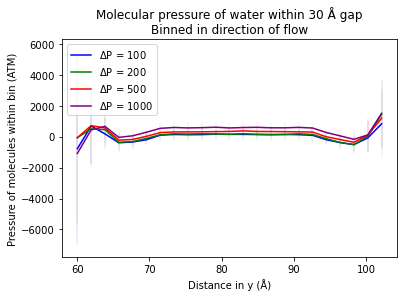

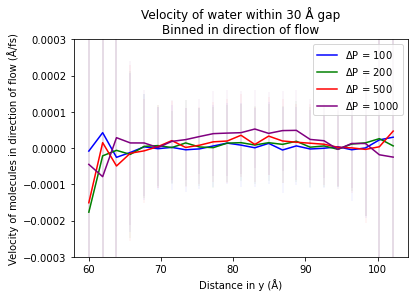

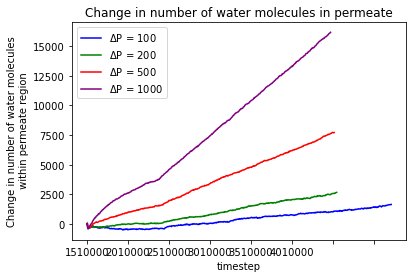

In [3]:
for gap_size in gap_sizes:
    pressureDFs = []
    p_fig,p_ax = plt.subplots()
    d_fig,d_ax = plt.subplots()
    v_fig,v_ax = plt.subplots()
    pgap_fig,pgap_ax = plt.subplots()
    vgap_fig,vgap_ax = plt.subplots()
    pcount_fig,pcount_ax = plt.subplots()
    for pressure_diff, color in zip(pressure_diffs, colors):
        pressureDF = pd.read_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_pressure_avg.csv')
        pressureDF = pressureDF.iloc[20:-10]
        pressureDF.rename(columns={'Distance in z (Å)' : 'Distance in z (Å)', 'mean' : '$\Delta$P = '+pressure_diff, 'stdev' : pressure_diff+'stdev'},inplace=True)
        pressureDF.plot(x='Distance in z (Å)', y='$\Delta$P = '+pressure_diff, ylabel='Pressure of molecules within bin (ATM)', xlim=(-50, 375), ylim = (-2000,1500),ax=p_ax, color=color)
        p_ax.errorbar(pressureDF['Distance in z (Å)'], pressureDF['$\Delta$P = '+pressure_diff], yerr = pressureDF[pressure_diff+'stdev'], alpha=0.05, color = color)
    
        densityDF = pd.read_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_density_avg.csv')
        densityDF = densityDF.iloc[20:-10]
        densityDF.rename(columns={'Distance in z (Å)' : 'Distance in z (Å)', 'mean' : '$\Delta$P = '+pressure_diff, 'stdev' : pressure_diff+'stdev'},inplace=True)
        densityDF.plot(x='Distance in z (Å)', y='$\Delta$P = '+pressure_diff, ylabel='Density of molecules within bin (g/cm$^3$)',xlim=(-50, 375), ylim = (0.9,1.1),ax=d_ax, color=color)
        d_ax.errorbar(densityDF['Distance in z (Å)'], densityDF['$\Delta$P = '+pressure_diff], yerr = densityDF[pressure_diff+'stdev'], alpha=0.05, color = color)
        
        velocityDF = pd.read_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_vz_avg.csv')
        velocityDF = velocityDF.iloc[20:-10]
        velocityDF.rename(columns={'Distance in z (Å)' : 'Distance in z (Å)', 'mean' : '$\Delta$P = '+pressure_diff, 'stdev' : pressure_diff+'stdev'},inplace=True)
        velocityDF.plot(x='Distance in z (Å)',y='$\Delta$P = '+pressure_diff, ylabel='Velocity of molecules in direction of flow (Å/fs)',xlim=(-50, 375),ylim = (-3e-4,3e-4),ax=v_ax, color=color)
        v_ax.errorbar(velocityDF['Distance in z (Å)'], velocityDF['$\Delta$P = '+pressure_diff], yerr = velocityDF[pressure_diff+'stdev'], alpha=0.05, color = color)
        
        pressureGapDF = pd.read_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_pressure_gap_avg.csv')
        pressureGapDF.rename(columns={'Distance in y (Å)' : 'Distance in y (Å)', 'mean' : '$\Delta$P = '+pressure_diff, 'stdev' : pressure_diff+'stdev'},inplace=True)
        pressureGapDF.plot(x='Distance in y (Å)',y='$\Delta$P = '+pressure_diff, ylabel='Pressure of molecules within bin (ATM)',ax=pgap_ax, color=color)
        pgap_ax.errorbar(pressureGapDF['Distance in y (Å)'], pressureGapDF['$\Delta$P = '+pressure_diff], yerr = pressureGapDF[pressure_diff+'stdev'], alpha=0.05, color = color)
        
        velocityGapDF = pd.read_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_vz_gap_avg.csv')
        velocityGapDF.rename(columns={'Distance in y (Å)' : 'Distance in y (Å)', 'mean' : '$\Delta$P = '+pressure_diff, 'stdev' : pressure_diff+'stdev'},inplace=True)
        velocityGapDF.plot(x='Distance in y (Å)',y='$\Delta$P = '+pressure_diff, ylabel='Velocity of molecules in direction of flow (Å/fs)',ylim = (-3e-4,3e-4),ax=vgap_ax, color=color)
        vgap_ax.errorbar(velocityGapDF['Distance in y (Å)'], velocityGapDF['$\Delta$P = '+pressure_diff], yerr = velocityGapDF[pressure_diff+'stdev'], alpha=0.05, color = color)
        
        resCountsDF = pd.read_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_res_counts.csv')
        resCountsDF = resCountsDF.T.iloc[1:][2]
        resCountsDF = resCountsDF-resCountsDF[0]
        resCountsDF.rename('$\Delta$P = '+pressure_diff,inplace=True)
        resCountsDF.plot(xlabel='timestep',ylabel='Change in number of water molecules\n within permeate region',legend=True,ax=pcount_ax,color=color)
        
    p_ax.set_xlabel('Distance in z (Å)')
    p_ax.set_title('Molecular pressure of water flowing through '+ gap_size +' Å gap\nBinned normal to flow')
    d_ax.set_xlabel('Distance in z (Å)')
    d_ax.set_title('Density of water flowing through '+ gap_size +' Å gap\nBinned normal to flow')
    v_ax.set_xlabel('Distance in z (Å)')
    v_ax.set_title('Velocity of water flowing through '+ gap_size +' Å gap\nBinned normal to flow')
    
    pgap_ax.set_xlabel('Distance in y (Å)')
    pgap_ax.set_title('Molecular pressure of water within '+ gap_size +' Å gap\nBinned in direction of flow')
    
    vgap_ax.set_xlabel('Distance in y (Å)')
    vgap_ax.set_title('Velocity of water within '+ gap_size +' Å gap\nBinned in direction of flow')
    if (gap_size == '06'): 
        vgap_ax.set_xlim(60,80)
        pgap_ax.set_xlim(60,80)
    elif (gap_size == '10'): 
        vgap_ax.set_xlim(58,88)
        pgap_ax.set_xlim(58,88)
    
    pcount_ax.set_title('Change in number of water molecules in permeate')
    
    p_fig.savefig('./plots/pagap'+gap_size+'_nve_pressure_avg_aggregate.jpg',bbox_inches='tight')
    d_fig.savefig('./plots/pagap'+gap_size+'_nve_density_avg_aggregate.jpg',bbox_inches='tight')
    v_fig.savefig('./plots/pagap'+gap_size+'_nve_vz_avg_aggregate.jpg',bbox_inches='tight')
    pgap_fig.savefig('./plots/pagap'+gap_size+'_nve_pressure_gap_avg_aggregate.jpg',bbox_inches='tight')
    vgap_fig.savefig('./plots/pagap'+gap_size+'_nve_vz_gap_avg_aggregate.jpg',bbox_inches='tight')
    pcount_fig.savefig('./plots/pagap'+gap_size+'_nve_perm_counts_aggregate.jpg',bbox_inches='tight')